In [1]:
import numpy as np

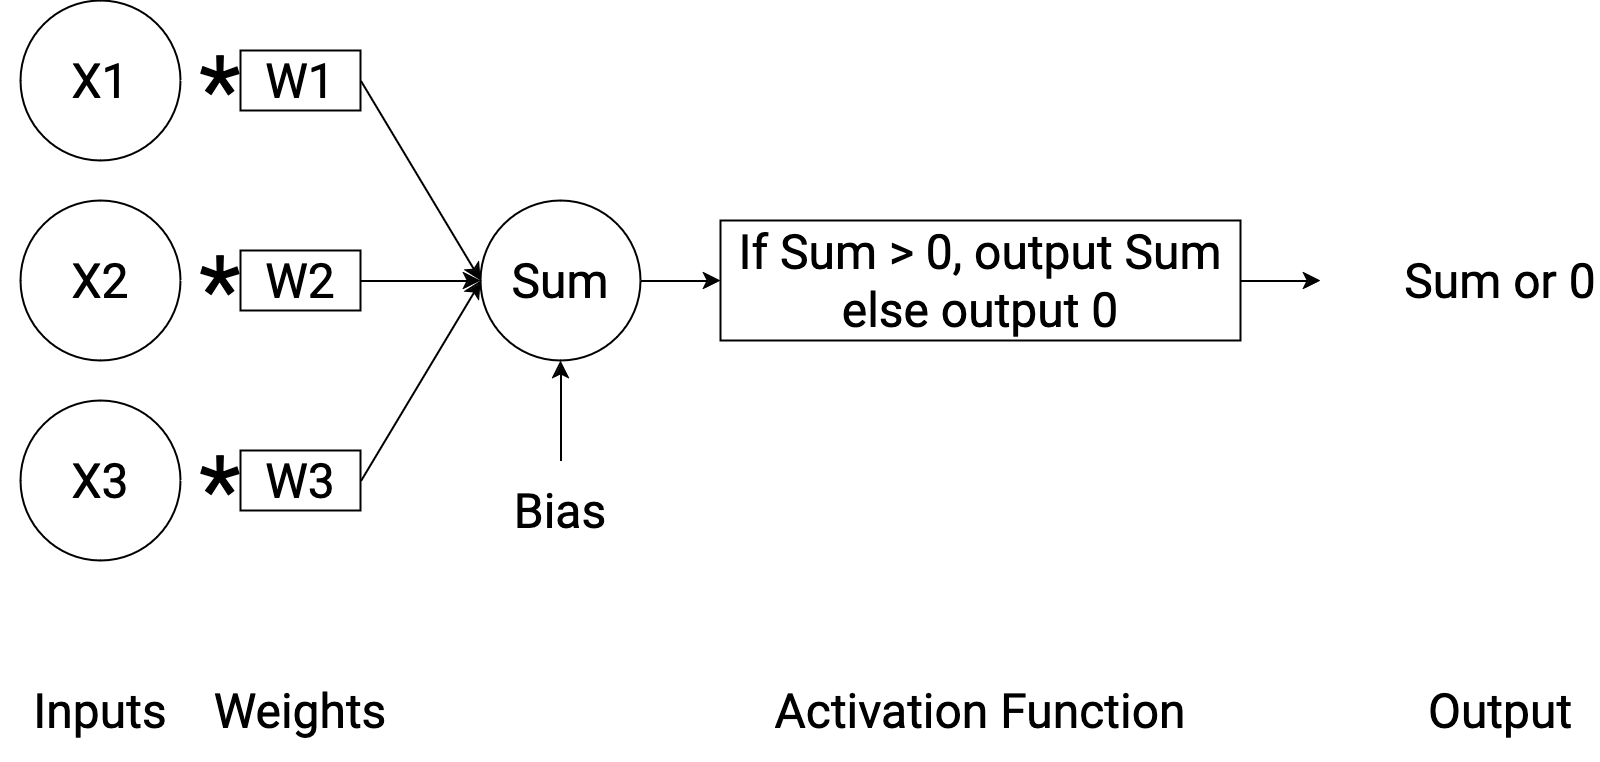

**Perceptron**:


1. Multiply inputs with matching weights. Sum them up, then add the Bias.

`(X1 * W1) + (X2 * W2) + (X3 * W3) + Bias` .


2. Input the sum into an activation function, to get an output. .

In [2]:
inputs  = [1, 2, 3]
weights = [2, 4, 6]
sum = 0
bias = 10

def activation_function(sum):
    if sum > 0:
        return sum
    else:
        return 0

for i in range(len(inputs)):
    sum += inputs[i] * weights[i]

sum += bias

print('Sum before activation function: ', sum)

output = activation_function(sum)

print('Output after activation function: ', output)

Sum before activation function:  38
Output after activation function:  38


**The Dot Product**

`[1, 2, 3] dot [1, 2, 3] = (1 x 1) + (2 x 2) + (3 x 3)`

`= 14`

In [3]:
print("[1, 2, 3] dot [1, 2, 3] = ", np.dot([1, 2, 3], [1, 2, 3]))

[1, 2, 3] dot [1, 2, 3] =  14


**Within a Perceptron**:

`(X1 * W1) + (X2 * W2) + (X3 * W3) + Bias`

Therefore the below dot product:

`[X1, X2, X3] dot [W1, W2, W3] + Bias`

`=`

`(X1 * W1) + (X2 * W2) + (X3 * W3) + Bias`

<br>

Now that we know dot product, let's update our code...

In [4]:
inputs  = [1, 2, 3]
weights = [2, 4, 6]
sum = 0
bias = 10

def activation_function(sum):
    if sum > 0:
        return sum
    else:
        return 0

sum = np.dot(inputs, weights) + bias

print('Sum before activation function: ', sum)

output = activation_function(sum)

print('Output after activation function: ', output)

Sum before activation function:  38
Output after activation function:  38


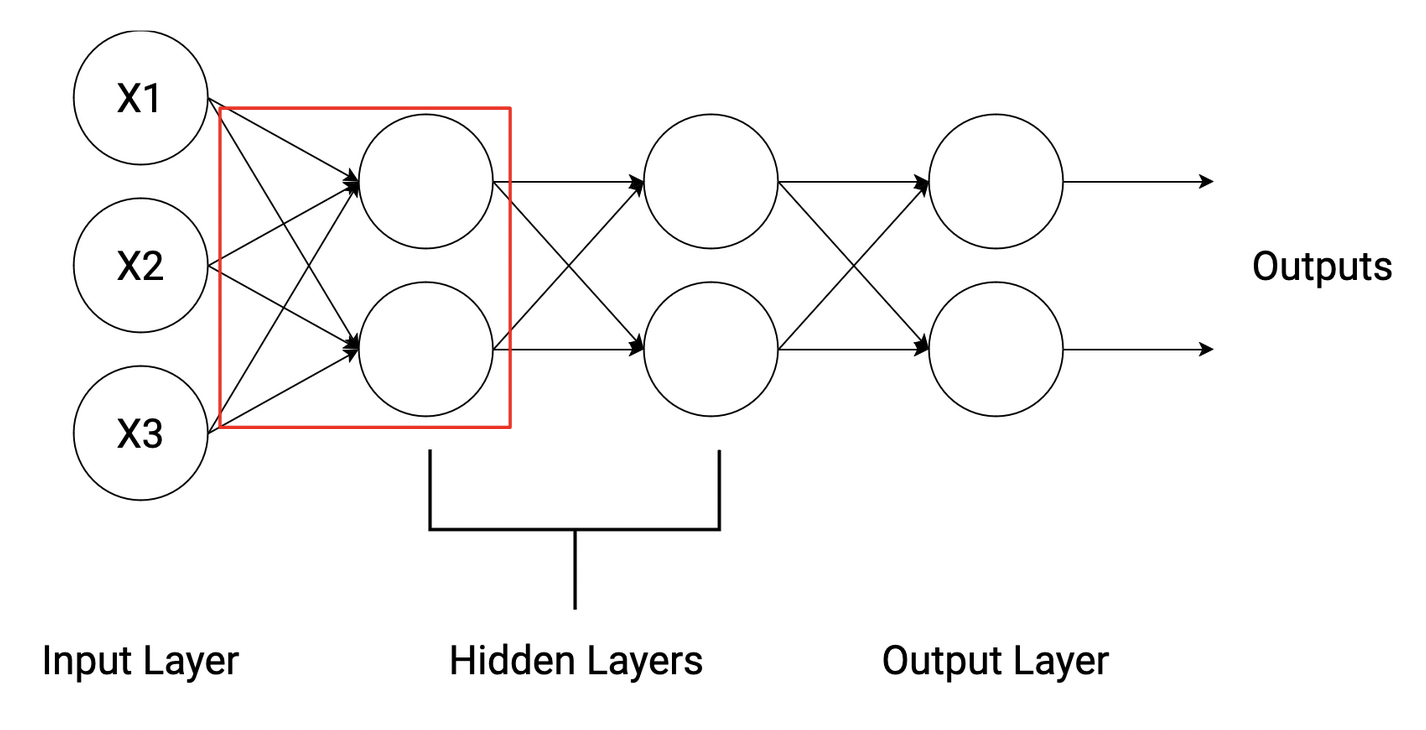

In [5]:
class Layer:
    def __init__(self):
        self.weights = [[2, 4, 6], # Weights for First Perceptron.
                        [1, 3, 5]] # Weights for Second Perceptron.
        self.biases =   [10, 5] # Biases for First and Second Perceptrons.
        self.activation_function = lambda sums: [sum if sum > 0 else 0 for sum in sums]

    def forward(self, inputs):
        perceptron_sums = []

        for perceptron_position in range(len(self.weights)):
            current_perceptron_weights = self.weights[perceptron_position]
            current_perceptron_sum = 0

            for input_position in range(len(inputs)):
                input_val = inputs[input_position]
                weight_val = current_perceptron_weights[input_position]
                current_perceptron_sum += (input_val * weight_val)

            current_perceptron_bias = self.biases[perceptron_position]
            current_perceptron_sum += current_perceptron_bias

            perceptron_sums.append(current_perceptron_sum)

        print('perceptron_sums before Activation Function: ', perceptron_sums)
        return self.activation_function(perceptron_sums)

layer = Layer()
print("Outputs", layer.forward([0, 1, 2]))

perceptron_sums before Activation Function:  [26, 18]
Outputs [26, 18]


In [6]:
class Layer:
    def __init__(self):
        self.weights = [[2, 4, 6], # Weights for First Perceptron.
                        [1, 3, 5]] # Weights for Second Perceptron.
        self.biases =   [10, 5] # Biases for First and Second Perceptrons.
        self.activation_function = lambda sums: [sum if sum > 0 else 0 for sum in sums]

    def forward(self, inputs):
        perceptron_sums = np.dot(self.weights, inputs) + self.biases

        print('perceptron_sums before Activation Function: ', perceptron_sums)
        return self.activation_function(perceptron_sums)

layer = Layer()
print("Outputs", layer.forward([0, 1, 2]))

perceptron_sums before Activation Function:  [26 18]
Outputs [26, 18]


In [7]:
class Layer:
    def __init__(self):
        self.weights = [[2, 4, 6], # Weights for First Perceptron.
                        [1, 3, 5]] # Weights for Second Perceptron.
        self.biases =   [10, 5] # Biases for First and Second Perceptrons.
        self.activation_function = lambda sums: [sum if sum > 0 else 0 for sum in sums]

    def forward(self, inputs):
        perceptron_sums = np.dot(inputs, self.weights) + self.biases

        print('perceptron_sums before Activation Function: ', perceptron_sums)
        return self.activation_function(perceptron_sums)

layer = Layer()
print("Outputs", layer.forward([0, 1, 2]))

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

If the order for `inputs` and `self.weights` in `np.dot()` switches, an error is thrown:

`ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)`

**Matrix Multiplication** makes use of the dot product.

Matrix Shape will be the **Rows and Columns**.

In [8]:
print(np.array([[1, 4, 2],
                [9, 4, 9]]).shape)

(2, 3)


For matrix multiplication:

**Inner shape numbers need to be equal:**

(2, **3**) dot (**3**, 2) --> Matrix Multiplication possible.

(2, **3**) dot (**2**, 3) --> Matrix Multiplication not possible.

**Outer shape numbers give us the output matrix shape:**

(**2**, 3) dot (3, **2**) --> (**2**, **2**).

So how do we fix our current issues with Matrix Multiplication?

**Transpose**  

Switches the rows and columns.

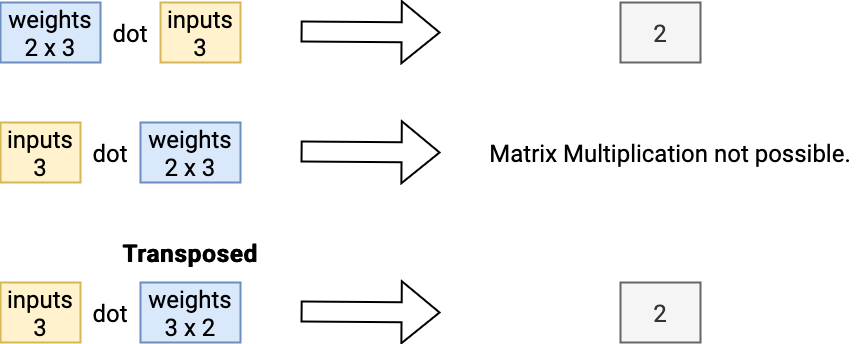

In [9]:
weights = np.array([[1, 4, 2],
                    [9, 4, 9]])
transposed = np.transpose(weights)

print("Weights: \n", weights)
print("Shape: ", weights.shape)
print()
print("Transposed: \n", transposed)
print("Shape: ", transposed.shape)

Weights: 
 [[1 4 2]
 [9 4 9]]
Shape:  (2, 3)

Transposed: 
 [[1 9]
 [4 4]
 [2 9]]
Shape:  (3, 2)


In [10]:
class Layer:
    def __init__(self):
        self.weights = [[2, 4, 6], # Weights for First Perceptron.
                        [1, 3, 5]] # Weights for Second Perceptron.
        self.biases =   [10, 5] # Biases for First and Second Perceptrons.
        self.activation_function = lambda sums: [sum if sum > 0 else 0 for sum in sums]

    def forward(self, inputs):
        perceptron_sums = np.dot(inputs, np.transpose(self.weights)) + self.biases

        print('perceptron_sums before Activation Function: ', perceptron_sums)
        return self.activation_function(perceptron_sums)

layer = Layer()
print("Outputs", layer.forward([0, 1, 2]))

perceptron_sums before Activation Function:  [26 18]
Outputs [26, 18]


**GPUs are great with the math (Matrix Multiplication) used in Deep Learning.**